# Gradient descent

### Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 
### To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. 
### But if we instead take steps proportional to the positive of the gradient, we approach a local maximum of that function; the procedure is then known as gradient ascent

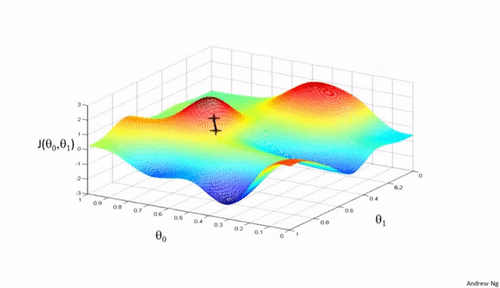

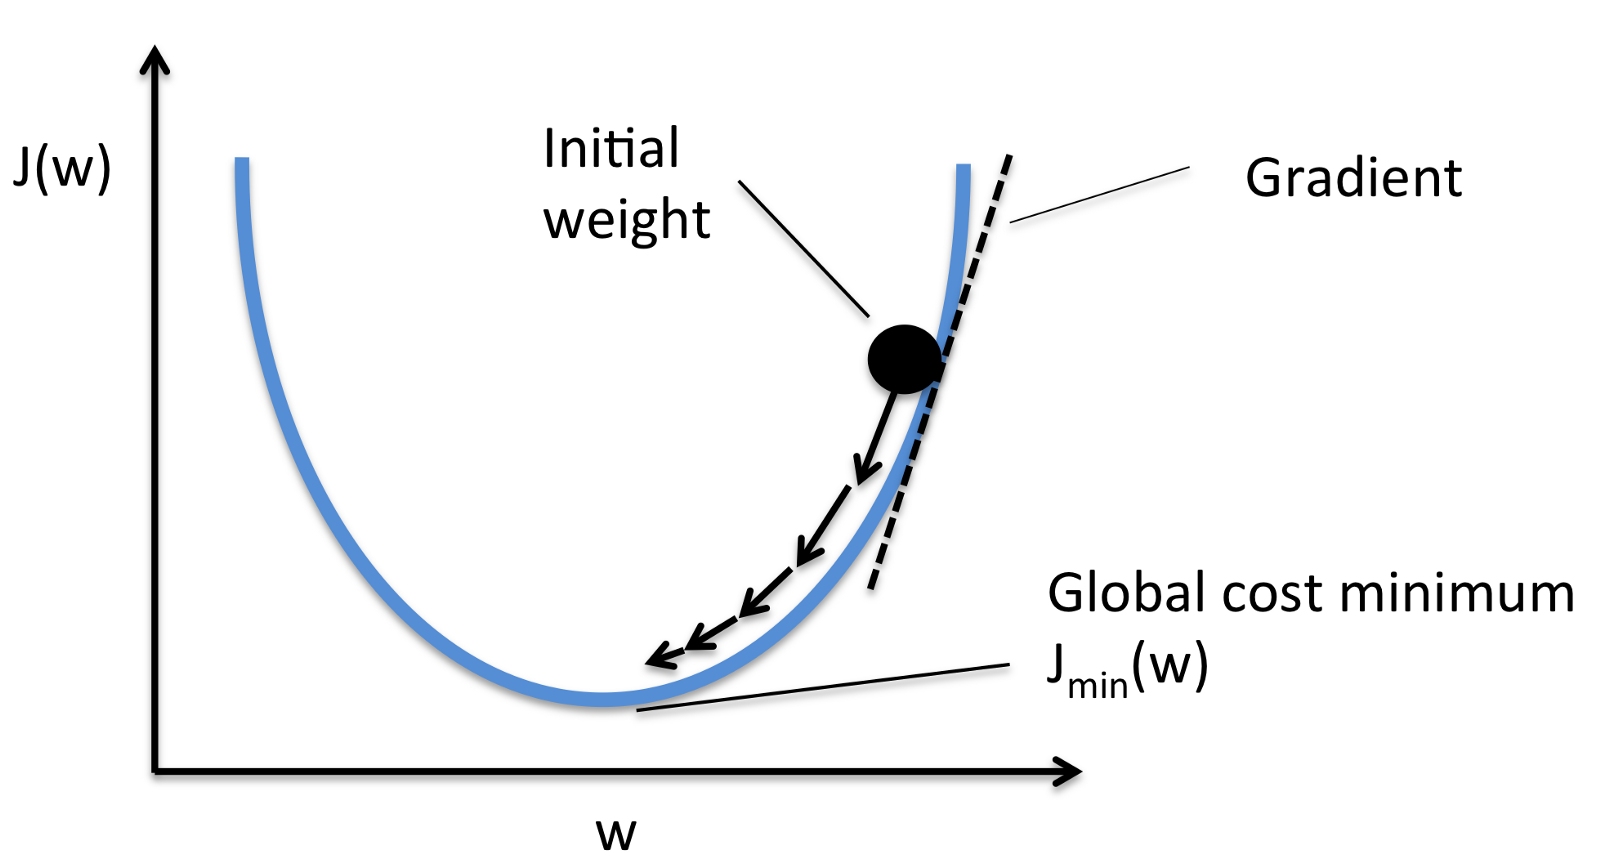

Gradient Descent formula

$ \displaystyle h_{\theta}(x)=\theta_0+\theta_1x \mbox{ and } J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2 $

$ \displaystyle\theta_j:=\theta_j-\alpha \frac{\partial}{\partial\theta_j}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) $

$ \displaystyle \frac{\partial}{\partial\theta_0}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right) = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right) $

$ \displaystyle \frac{\partial}{\partial\theta_1}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right).x^{(i)} = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right).x^{(i)} $

$ \displaystyle\mbox{ repeat until convergence }\left\{\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}f(\theta_0,\theta_1)\mbox{ for j=0,1} \right\} $

### In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. 
### Since it influences to what extent newly acquired information overrides old information, it metaphorically represents the speed at which a machine learning model "learns". In the adaptive control literature, the learning rate is commonly referred to as gain.

# challenges

### If the data is arranged in a way that it poses a non-convex optimization problem. It is very difficult to perform optimization using gradient descent. Gradient descent only works for problems which have a well defined convex optimization problem.



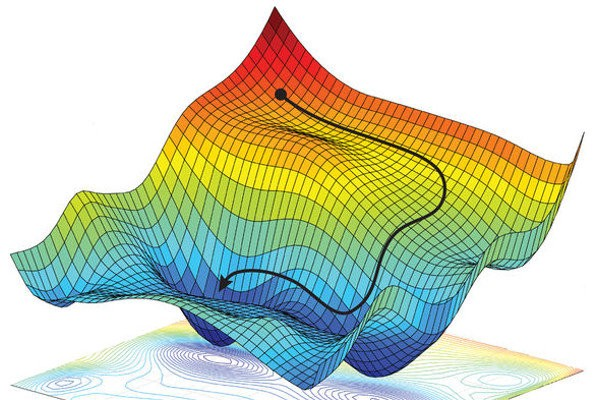

### Even when optimizing a convex optimization problem, there may be numerous minimal points. The lowest point is called global minimum, whereas rest of the points are called local minima. Our aim is to go to global minimum while avoiding local minima.

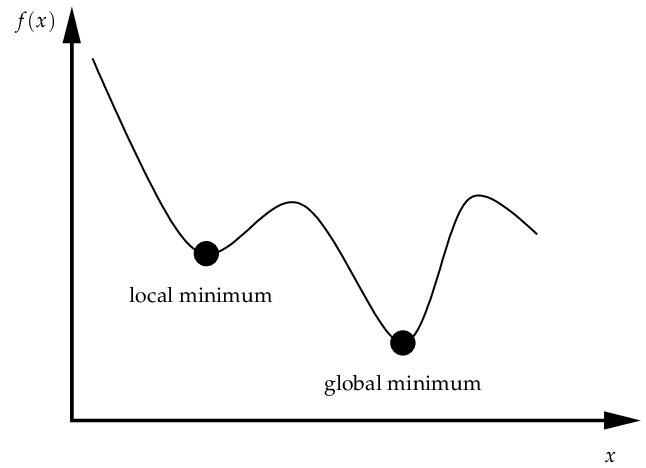

### If the execution is not done properly while using gradient descent, it may lead to problems like vanishing gradient or exploding gradient problems. These problems occur when the gradient is too small or too large. And because of this problem the algorithms do not converge

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [3]:
salary_dataset=pd.read_csv('salary.csv')
salary_dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [4]:
x=np.array(salary_dataset['YearsExperience'])
y=np.array(salary_dataset['Salary'])
l=len(x)

In [5]:
l

30

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)
lx=len(x_train)

In [9]:
m=0.1
c=0.01
alpha=0.01
n=4000
for i in range(n):
    slope=0
    intercept=0
    for j in range(lx):
        intercept=intercept+((m*x_train[j]+c)-y_train[j])
        slope=slope+((m*x_train[j]+c)-y_train[j])*x_train[j]
    c=c-alpha*(intercept/lx)
    m=m-alpha*(slope/lx)

In [10]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is 9661.770520278025
intercept is 25227.29486229368


In [11]:
y_pred=np.dot(m,x_test)+c
y_pred

array([ 35855.2424346 ,  64840.55399543,  54212.60642313,  63874.37694341,
        93825.86555627,  72569.97041166, 126675.88532521, 112183.2295448 ])

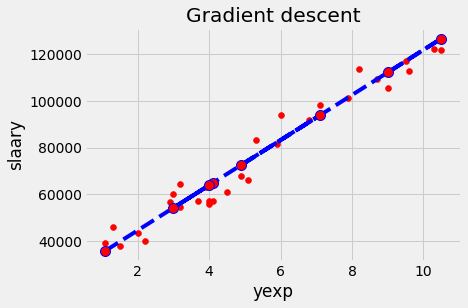

In [12]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yexp")
plt.ylabel("slaary")
plt.title("Gradient descent")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [14]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

32920447.21035915
5737.634286912957
5573.287725813661
0.9610803330349375
0.9550256304021368
